# 코드 예시) Random 함수 


In [ ]:
import random

In [17]:
#random.random() -> 0.0에서 1.0사이의 실수 중에서 난수값 리턴
print(random.random()) 
# ex) 0.2664520652284096

#random.uniform(a, b) -> 괄호 안 두 수 사이의 실수 중에서 난수값을 리턴
print(random.uniform(10, 30)) 
# ex) 28.038707445386397

#random.randint(a, b) -> 괄호 안 두 수 사이의 정수 중에서 난수값을 리턴
print(random.randint(100,200))
# ex) 106

#random.choice(sample) 함수 -> sample에서 무작위로 하나를 선택하여 리턴
data = [1, 2, 3, 4, 5, 6, 7]
print(random.choice(data))
# ex) 5

#random.sample(sample, n) -> 입력으로 받은 sample 에서 정한 개수만큼  무작위로 뽑아 리턴함
data = [1, 2, 3, 4, 'apple', 'banna']
print(random.sample(data, 3))
# ex) ['apple', 2, 3]
print(random.sample(data, 3))
# ex) ['apple', 3, 'banna']
print(random.sample(data, 5))
# ex) [2, 3, 1, 'apple', 4]

0.6808169533644002
22.764074107432297
189
6
[1, 4, 2]
[3, 2, 4]
[2, 1, 4, 'banna', 'apple']


# 실습1. 난수 히스토그램 그리기 (Python Random module)


In [16]:
# import packages
import matplotlib.pyplot as plt
from tqdm import tqdm # optional
import random

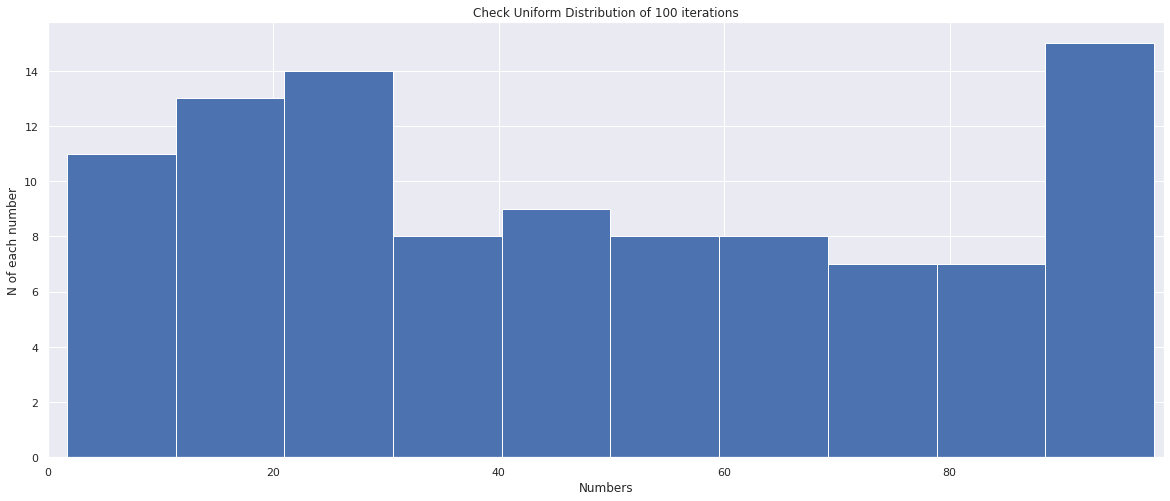

In [36]:

#100번 수행하기
num_iterations = 100
random_integers = []
for i in range(num_iterations):
  random_integers.append(random.uniform(0,99))

plt.hist(random_integers)
plt.title("Check Uniform Distribution of 100 iterations")
plt.ylabel("N of each number")
plt.xlabel("Numbers")
plt.xlim([0,99])
plt.show()

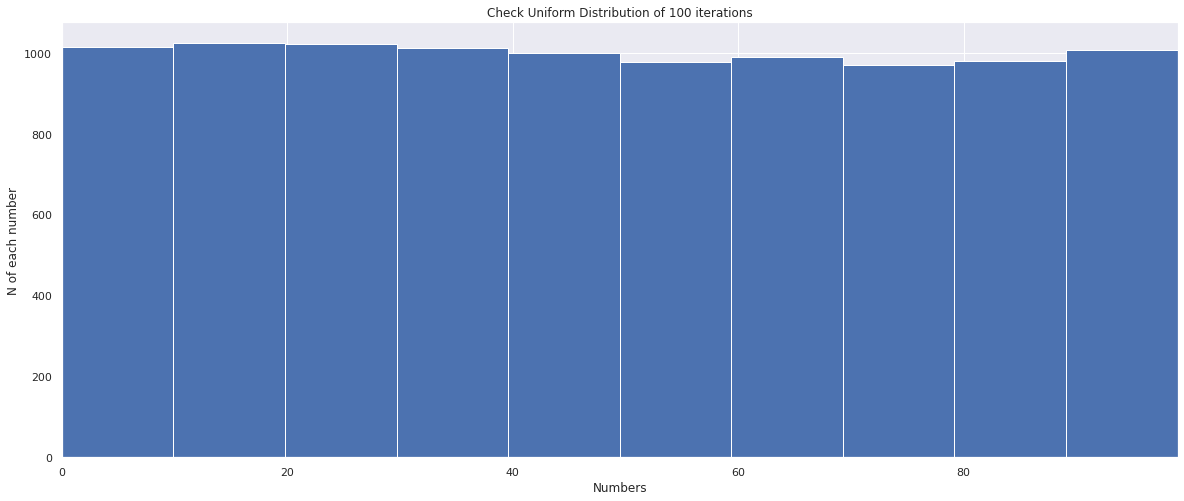

In [37]:


#10000번 수행하기
num_iterations = 10000
random_integers = []
for i in range(num_iterations):
  random_integers.append(random.uniform(0,99))

plt.hist(random_integers)
plt.title("Check Uniform Distribution of 100 iterations")
plt.ylabel("N of each number")
plt.xlabel("Numbers")
plt.xlim([0,99])
plt.show()

# 실습 2. Linear Congruential Generator(LCG) 구현  

Linear Congruential Generator(LCG) 구현  

X_(n+1) = (aX_n+C) mod m

LCG는 다음과 같은 인자들로 유일하게 결정됨  
  - 0 < m, 0 < a < m, 0 <= c < m, 0<=초기값 < m  

최대 주기 m을 가지기 위한 필요충분조건  

  - c와 m이 서로소, a-1이 m의 모든 소인수로 나뉨 
  - m이 4의 배수면 a-1도 4의 배수

In [42]:
def lcg(seed, loop, m=2**32, a=214013, c=2531011):
    for i in range(loop):
        # write answer
        seed = (a * seed + c) % m
        yield seed

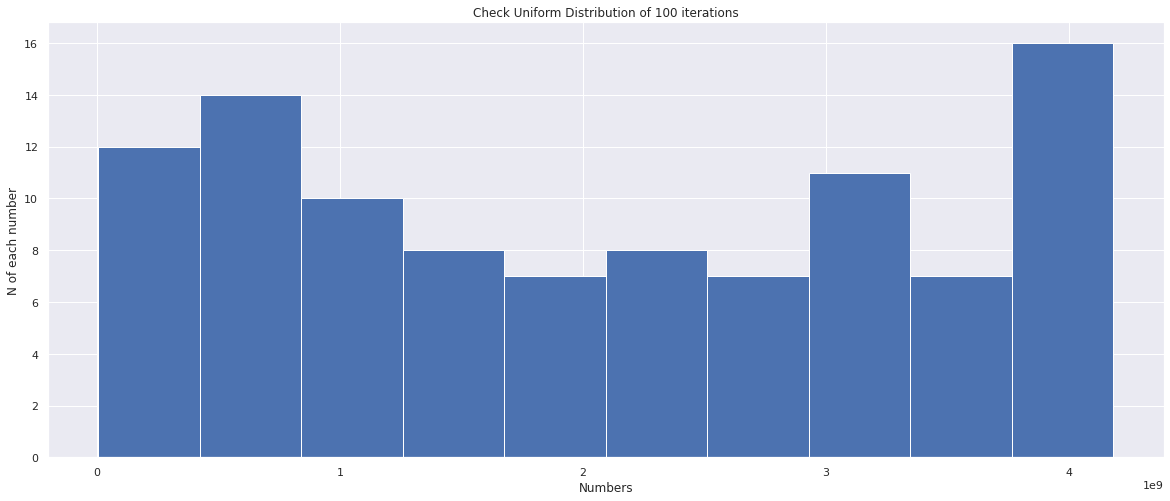

In [44]:
num_iterations = 100
random_generator = lcg(seed=13, loop=num_iterations, m=2**32)
random_integers = []


for i in random_generator:
  random_integers.append(i)
 
plt.hist(random_integers)
plt.title("Check Uniform Distribution of 100 iterations")
plt.ylabel("N of each number")
plt.xlabel("Numbers")
plt.show()

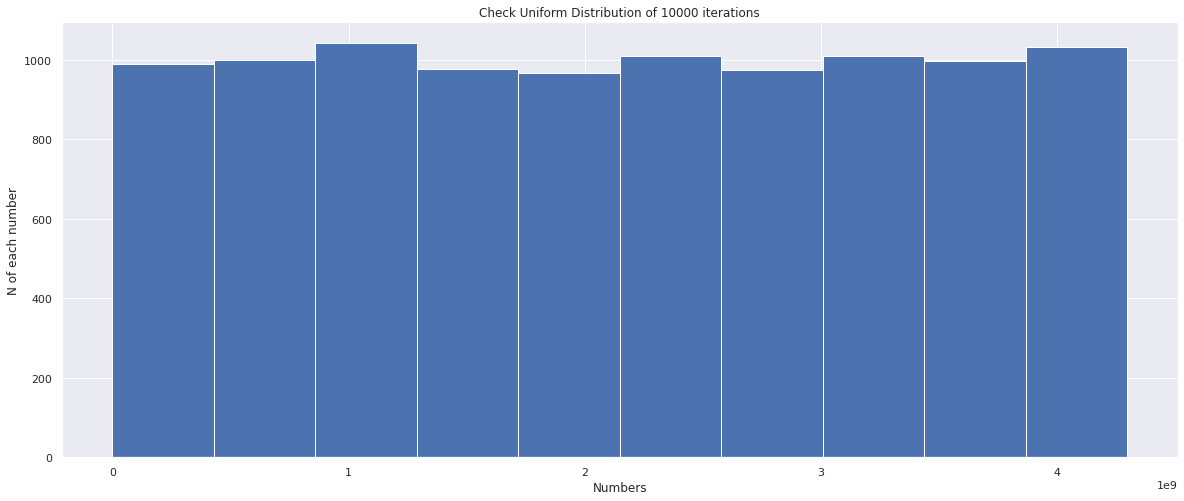

In [45]:
num_iterations = 10000
random_generator = lcg(seed=13, loop=num_iterations, m=2**32)
random_integers = []


for i in random_generator:
  random_integers.append(i)
 
plt.hist(random_integers)
plt.title("Check Uniform Distribution of 10000 iterations")
plt.ylabel("N of each number")
plt.xlabel("Numbers")
plt.show()

# 실습 3. 주사위 합이 8인 경우

In [46]:
# 출력시 컬러 지원 가능 모듈 설치
!pip install termcolor
from termcolor import colored
!pip install colorama
from colorama import init, Fore, Back, Style


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
def roll_dice():
  a = random.randint(1,6)
  b = random.randint(1,6)
  return [a,b]
  pass

In [48]:
dice_tries = []
num_iterations = 100
hits = 0
for _ in range(num_iterations):
    ## write answer
    dice = roll_dice()
    if (dice[0]+dice[1] == 8) :
      hits+=1
    dice_tries.append(dice)
    pass

print("="*100)
print(colored("* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *", 'red'))

for i in range(num_iterations):
  ## write answer
  if dice_tries[i][0] + dice_tries[i][1] == 8:
    print(colored(Back.CYAN + "try {:5d}  :  {:d}  {:d} ".format(i,dice_tries[i][0],dice_tries[i][1]),"yellow") ,end='')
  else :
   print("try {:5d}  :  {:d}  {:d} ".format(i,dice_tries[i][0],dice_tries[i][1]) ,end='')

  if i % 5 ==4 :
    print("\n")
  pass

print(colored("\n실제 값 : 0.138889", "red"))
print(colored(f"계산된 값 : {round(hits / num_iterations,6)}", "red"))
print(colored(f"오차율 : {abs(hits / num_iterations - 5/36) / (5/36) * 100} %", "red"))
print("="*100)

* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *
try     0  :  5  4 try     1  :  6  1 try     2  :  5  4 try     3  :  1  6 try     4  :  1  3 

try     5  :  2  5 try     6  :  3  4 try     7  :  6  5 try     8  :  3  5 try     9  :  4  1 

try    10  :  2  5 try    11  :  6  6 try    12  :  5  2 try    13  :  3  4 try    14  :  2  3 

try    15  :  3  3 try    16  :  5  3 try    17  :  5  6 try    18  :  3  4 try    19  :  6  2 

try    20  :  6  6 try    21  :  4  4 try    22  :  6  6 try    23  :  5  5 try    24  :  4  2 

try    25  :  2  6 try    26  :  1  6 try    27  :  2  3 try    28  :  5  3 try    29  :  3  3 

try    30  :  6  2 try    31  :  6  5 try    32  :  3  6 try    33  :  2  1 try    34  :  1  1 

try    35  :  4  1 try    36  :  1  1 try    37  :  5  2 try    38  :  2  4 try    39  :  4  2 

try    40  :  4  6 try    41  :  4  3 try    42  :  6  1 try    43  :  2  5 try    44  :  2  3 

try    45  :  3  1 try    46  :  1  3 try    47  :  5  5 try    48  :  2  4 try    49 

# 실습 4. 주사위 게임

In [96]:
def roll_dice():
    a = random.randint(1,6)
    b = random.randint(1,6)
    return [a,b]

In [116]:
# Inputs
num_simulations = 10000 #인원수
max_num_rolls = 1000 #몇번
bet = 1

win_probability = [] #승률
end_balance = [] #잔액

(0.0, 1000.0)

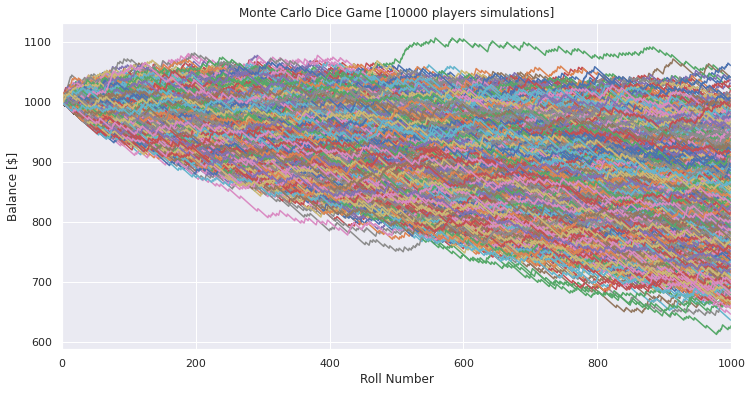

In [117]:
plt.figure(figsize=(12,6))

for i in range(num_simulations):
    roll_result=[]
    win=0
    money = 1000
    ## write answer
    for j in range(max_num_rolls):
      roll_result.append(money)
      dice_result = roll_dice()
      if dice_result[0] == dice_result[1] :
        money += 4
        win += 1
      else:
        money -= bet
    win_probability.append(win)
    end_balance.append(money)
    plt.plot(roll_result)
    pass

plt.title("Monte Carlo Dice Game [" + str(num_simulations) + " players simulations]")
plt.xlabel("Roll Number")
plt.ylabel("Balance [$]")
plt.xlim([0, max_num_rolls])

In [119]:
#전체 승률 = 이긴횟수 / 전체 횟수
#전체 잔돈 = 
overall_win_probability= (sum (win_probability )/ (max_num_rolls * num_simulations) )
overall_end_balance = sum(end_balance ) / num_simulations
/ num_simulations
print(f"10000명 플레이어의 {max_num_rolls}번 수행 횟수 시 평균 승률" + "  :  " + colored(f"{overall_win_probability:.2f}","red"))
print(f"10000명 플레이어의 {max_num_rolls}번 수행 횟수 시 평균 잔액 "  + f" : {colored('$','red')}" + colored(f"{overall_end_balance:.2f}","red"))

10000명 플레이어의 1000번 수행 횟수 시 평균 승률  :  0.17
10000명 플레이어의 1000번 수행 횟수 시 평균 잔액  : $833.14


# 실습 5. 원주율 구하기

# 초기 세팅

(-2.0, 2.0)

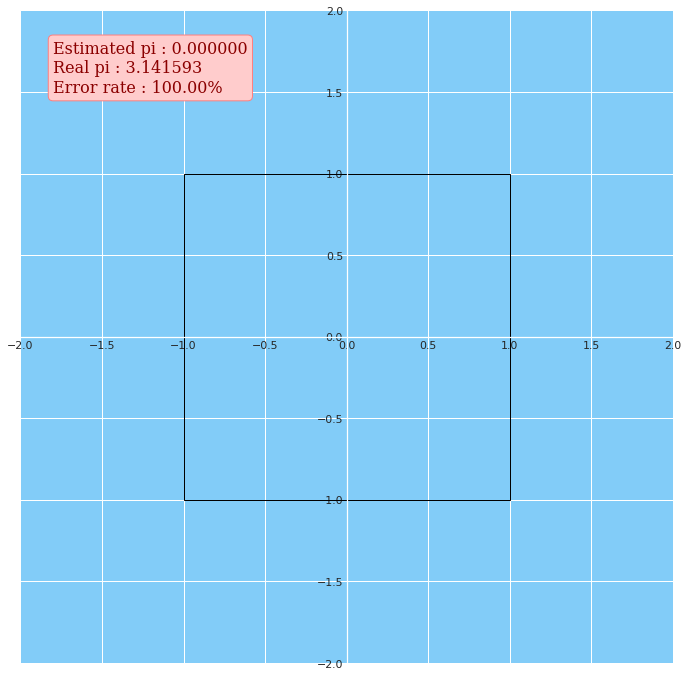

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

pi = 0

plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.5, f"Estimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# pi 추측

(-2.0, 2.0)

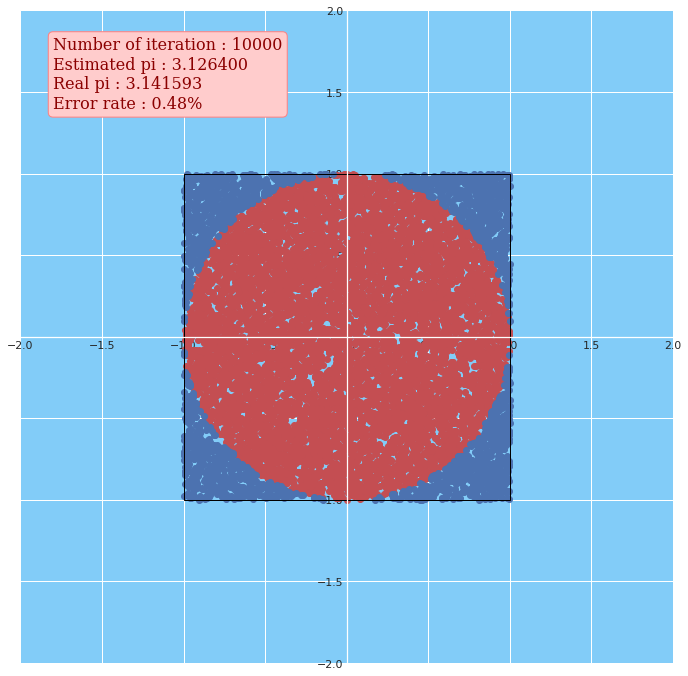

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

MAX_POINTS = 10000

## write answer
pi = 0
cir=[]
out_cir=[]


x = np.random.uniform(low = -1, high = 1, size = MAX_POINTS)
y = np.random.uniform(low = -1, high = 1, size = MAX_POINTS)

for i in range(MAX_POINTS) : 
  if (x[i]**2 + y[i]**2 <= 1) :
    cir.append([x[i],y[i]])
  else:
    out_cir.append([x[i],y[i]])

pi = len(cir) / MAX_POINTS
pi *= 4

###
plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
# write code
cir = np.array(cir)
out_cir = np.array(out_cir)
ax.scatter(cir[0:,0:1],cir[0:,1:2,],c='r')
ax.scatter(out_cir[0:,0:1],out_cir[0:,1:2])
###

# ax.scatter 이용
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.4, f"Number of iteration : {MAX_POINTS}\nEstimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# 정확도를 0.1% 미만으로 만들어 보기 

(-2.0, 2.0)

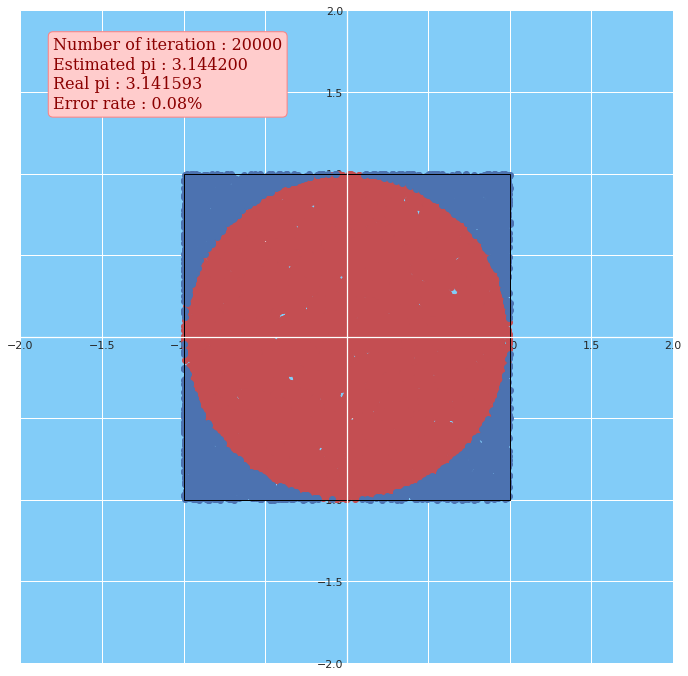

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

MAX_POINTS = 20000

## write answer
pi = 0
cir=[]
out_cir=[]


x = np.random.uniform(low = -1, high = 1, size = MAX_POINTS)
y = np.random.uniform(low = -1, high = 1, size = MAX_POINTS)

for i in range(MAX_POINTS) : 
  if (x[i]**2 + y[i]**2 <= 1) :
    cir.append([x[i],y[i]])
  else:
    out_cir.append([x[i],y[i]])

pi = len(cir) / MAX_POINTS
pi *= 4

###
plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
# write code
cir = np.array(cir)
out_cir = np.array(out_cir)
ax.scatter(cir[0:,0:1],cir[0:,1:2,],c='r')
ax.scatter(out_cir[0:,0:1],out_cir[0:,1:2])
###

# ax.scatter 이용
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.4, f"Number of iteration : {MAX_POINTS}\nEstimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# 실습 6. 계약 손익 예측

In [101]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 시뮬레이션 횟수
N_ROUNDS = 10000
results = []
for rnd in range(N_ROUNDS):
    ## write answer
    base = random.triangular(low=1, high=9,mode=3)
    win = random.random() ##노벨상 수상 확률 0.5
    if (win > 0.5): #수상하면 매출 증가
      base = base * (1+random.triangular(low=0.25, high = 0.75, mode = 0.5))
    results.append(base)
  
    sales = None
   # results.append(sales)

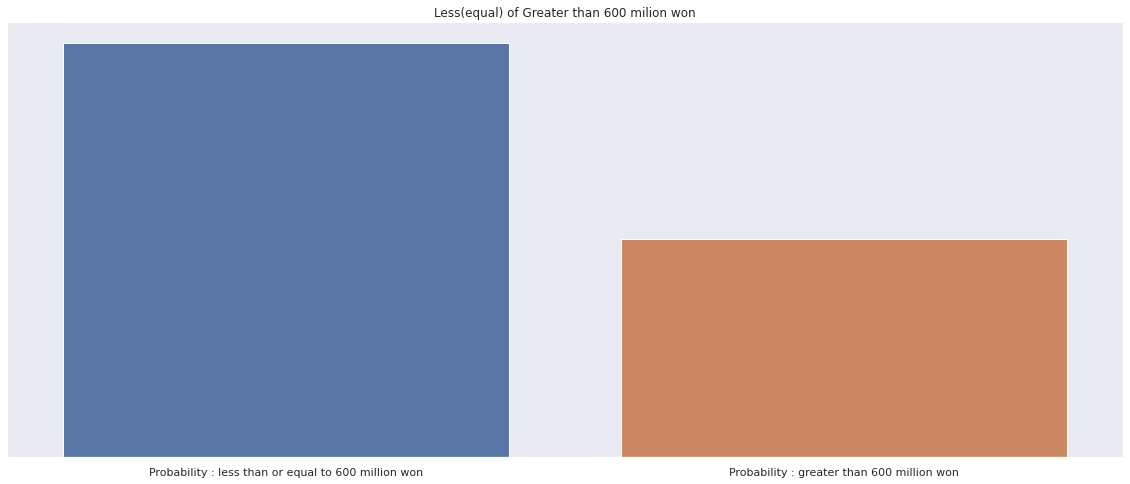

In [104]:
# 모든 시나리오에서 나온 신작 판매량의 평균 
average_sales = np.mean(results)

binned_results = pd.cut(results, bins=[0, 6, 20], labels=[
    "Probability : less than or equal to 600 million won",
    "Probability : greater than 600 million won"])

# 결과물 시각화
sns.barplot(x=binned_results.value_counts().index,
            y=binned_results.value_counts().values)
## write answer
plt.title("Less(equal) of Greater than 600 milion won") #제목
sns.set(rc = {'figure.figsize':(20,8)}) #크기를 키우기 위함
ax = plt.gca() #왼쪽 y축을없애기 위함
ax.axes.yaxis.set_visible(False)


In [33]:
C1 , C2 = binned_results.value_counts()
P1 = round(C1 * 100 / N_ROUNDS, 2)
P2 = round(C2 * 100 / N_ROUNDS, 2)

print("6억원 이하의 매출을 얻을 확률 :", colored(f"{P1}","red") )
print("6억원 초과의 매출을 얻을 확률 :", colored(f"{P2}","blue"))

6억원 이하의 매출을 얻을 확률 : 64.95
6억원 초과의 매출을 얻을 확률 : 35.05


# 실습 7 헬스장 수익 예측


In [77]:
import numpy as np
import seaborn as sns
from termcolor import colored

In [93]:
np.random.seed(1)
subscription_data = {"Month": range(1, 60), 
                     "Growth": np.random.normal(0, 0.05, 60)}

N_ROUNDS = 10000
results = []

historical_data = subscription_data["Growth"]
for rnd in range(N_ROUNDS):
    ## write answer
    
    people = 2000
    sales = 0
    for i in range(12):
      random_mon = random.randint(0,59)
      people = (1+ historical_data[random_mon]) * people
      sales += 50000 * people
    results.append(sales)
    pass
   

# 99%의 신뢰도  
- 10000개의 수행 결과를 낮은 수익부터 순서대로 정렬하고 100번째(100/10000)번째의 수익을 확인

In [94]:
print("하위 1%의 수익 : ", colored(f"{sorted(results)[100] / 1e8:.4f} 억","red"))

lower_revenue = sorted(results)[100]
print(f"매년 준비해야할 금액 : ",  colored(f"{(12*9.5*1e7 - lower_revenue)/1e8:.4f} 억","red"))

하위 1%의 수익 :  9.5484 억
매년 준비해야할 금액 :  1.8516 억


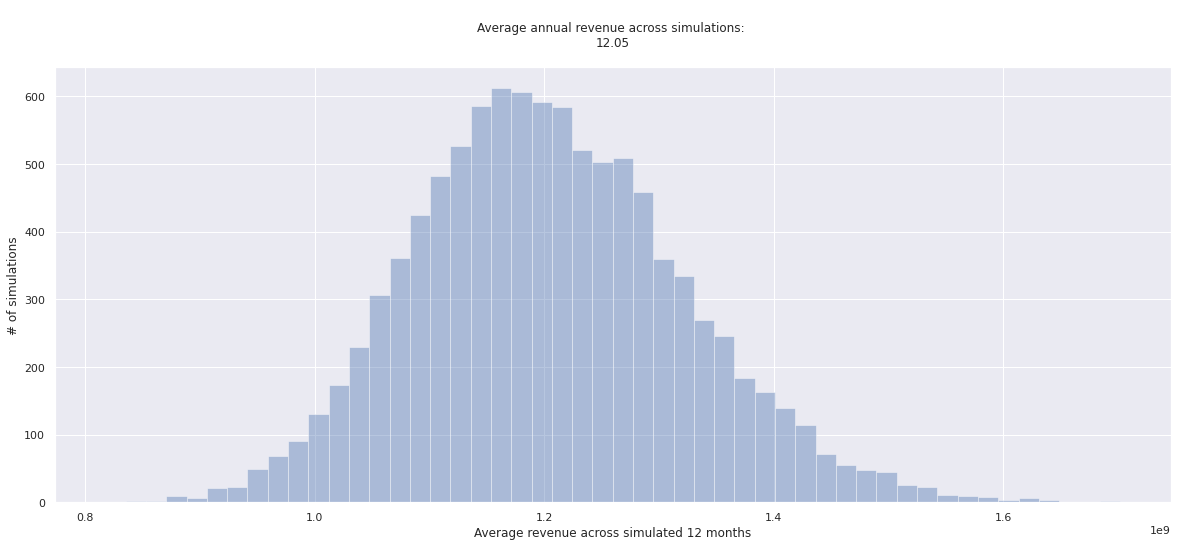

In [95]:
ax = sns.distplot(results, kde=False)
ax.set_xlabel("Average revenue across simulated 12 months")
ax.set_ylabel("# of simulations")
plt.title(f"""
Average annual revenue across simulations: 
{round(np.mean(results)/1e8, 2)}
""")
plt.show()